In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Here we take open column as target feature and try to predict stock price in next month (Jan 2017)

In [18]:
training_set = dataset_train.iloc[:,1:2].values

#### Feature scaling 

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
sc = MinMaxScaler(feature_range = (0, 1))

In [19]:
training_set_scaled = sc.fit_transform(training_set)

#### Creating Data structure with 60 timesteps and 1 output

In [20]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [21]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

### Reshaping 

In [23]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [24]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Apply RNN LSTM Model

In [25]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [26]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0495
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0070
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0040
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 1

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 87/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 88/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 89/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 90/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 91/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 92/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 93/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 94/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 95/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 5s 5ms/step - loss: 

### Making Prediction and visualising a results 

In [27]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


In [28]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

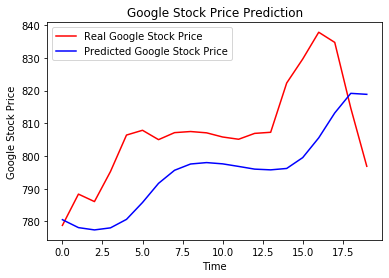

In [29]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()